In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/pix2pix/')

In [3]:
import dataloader
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch

In [4]:
lfw = dataloader.lfw_dataset(rootdir = '../generated/lfw/', )

In [5]:
print (len(lfw))

13233


# loading the datagenerator with no transforms

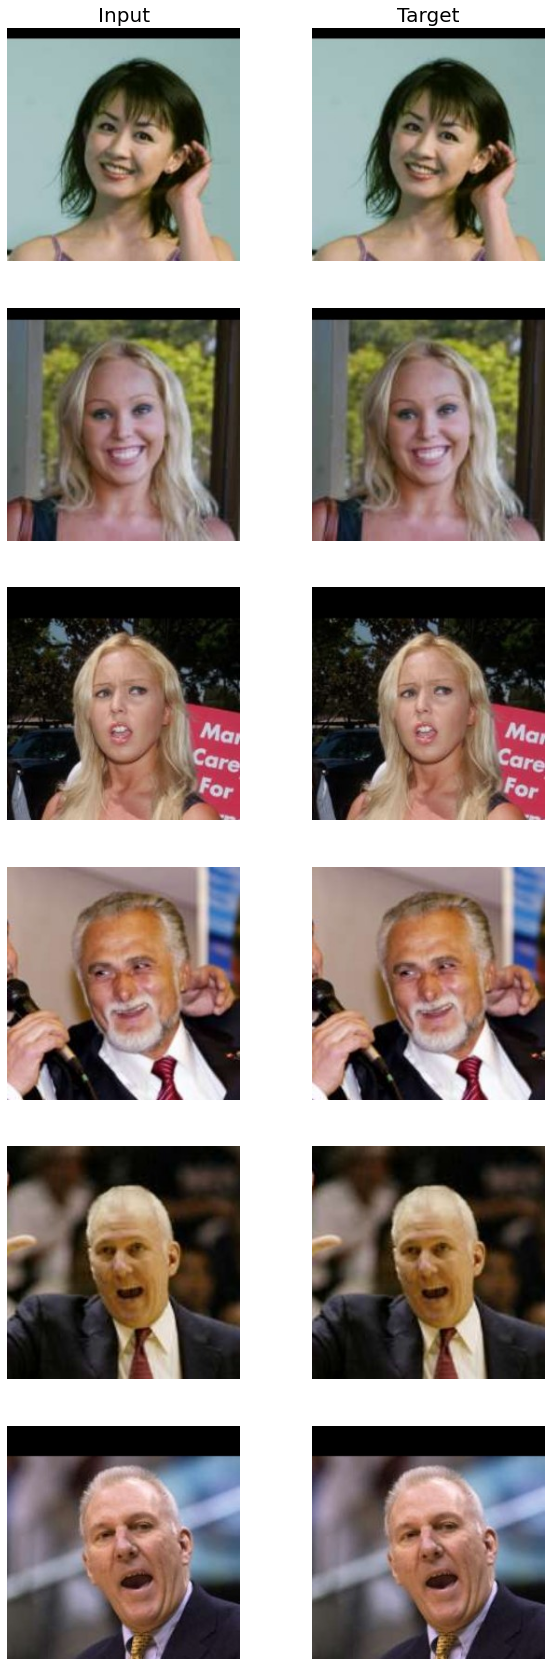

In [10]:
n_rows = 6
n_cols = 2

fig = plt.figure(figsize = (10, 30))


for i in range(0, n_cols * n_rows - 1, 2):
    ip, tgt = lfw[i]
    
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.imshow(ip.permute(1, 2, 0))
    ax.axis('off')
    
    if i == 0:
        ax.set_title('Input', fontsize = 20)   
    
    ax = fig.add_subplot(n_rows, n_cols, i + 2)
    ax.imshow(tgt.permute(1, 2, 0))
    ax.axis('off')
    
    if i == 0:
        ax.set_title(f'Target', fontsize = 20)

# loading the datagenerator with addition of noise with std_div between 0 and 1

In [51]:
def GaussianNoise(tensor):
    std = torch.rand(1)    
    mean = 0

    noisy = tensor + torch.randn_like(tensor) * std + mean
    noisy = noisy.clip(0, 1)
    return noisy

transforms_list = torchvision.transforms.Compose([
    GaussianNoise,
])

In [52]:
lfw = dataloader.lfw_dataset(rootdir = '../generated/lfw/', transforms = transforms_list)

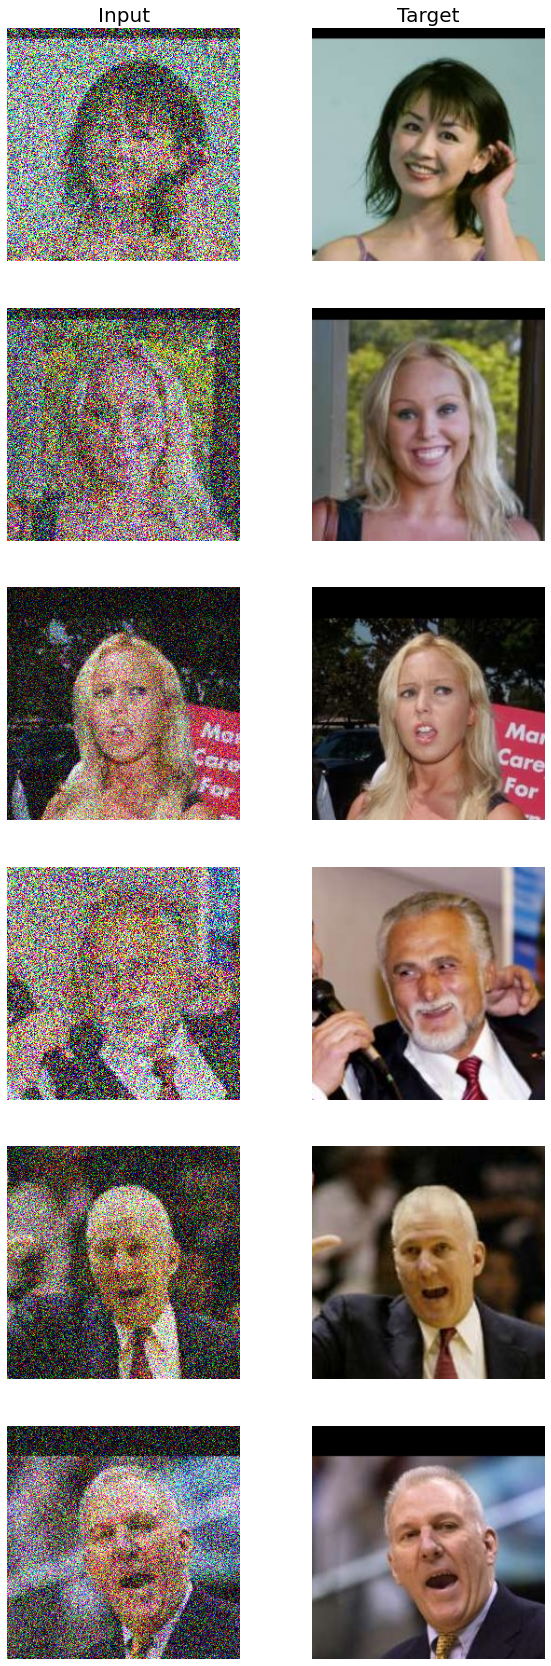

In [53]:
n_rows = 6
n_cols = 2

fig = plt.figure(figsize = (10, 30))


for i in range(0, n_cols * n_rows - 1, 2):
    ip, tgt = lfw[i]
    
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.imshow(ip.permute(1, 2, 0))
    ax.axis('off')
    
    if i == 0:
        ax.set_title('Input', fontsize = 20)   
    
    ax = fig.add_subplot(n_rows, n_cols, i + 2)
    ax.imshow(tgt.permute(1, 2, 0))
    ax.axis('off')
    
    if i == 0:
        ax.set_title(f'Target', fontsize = 20)